In [28]:
import numpy as np
import pandas as pd
from Plan import CreateSamples as create
import matplotlib.pyplot as plt

In [29]:
path1 = r"C:\Users\Edwin\Desktop\OT2-DOE\PlanPrepareProcess\Temp or Working\06_03_21_5CB_SDS_Blanked"
full_data = pd.read_csv(path1)
full_data['Total Volume uL'] = create.isolate_common_column(full_data, 'stock').sum(axis=1)
stock_volumes = create.isolate_common_column(full_data, 'stock')
component_concentrations = create.isolate_common_column(full_data, 'concentration')
stock_concentrations = [2.5, 1.75, 0.5, 1] # the 0.5 was wrong
create.isolate_common_column(full_data,'5CB')

,5CB concentration wtf,5CB amount mass g,5CB amount volume uL,5CB-ethanol-stock amount volume uL
0,0.00025,0.000162,0.160891,65.0
1,0.00025,0.000162,0.160891,65.0
2,0.00025,0.000162,0.160891,65.0
3,0.00025,0.000162,0.160891,65.0
4,0.00025,0.000162,0.160891,65.0
...,...,...,...,...
92,0.00100,0.000650,0.643564,260.0
93,0.00100,0.000650,0.643564,260.0
94,0.00100,0.000650,0.643564,260.0
95,0.00100,0.000650,0.643564,260.0


In [41]:
# need to calculate everything from volumes
cb_grams = (stock_volumes['5CB-ethanol-stock amount volume uL']/1000)*2.5/1000
sds_grams = (stock_volumes['SDS-ethanol-stock amount volume uL']/1000)*1.75/1000
ethanol_grams = 0.789*((stock_volumes['ethanol-stock amount volume uL'] + stock_volumes['5CB-ethanol-stock amount volume uL'] + stock_volumes['SDS-ethanol-stock amount volume uL'] - cb_grams - sds_grams)/1000)
water_grams = 1*stock_volumes['water-stock amount volume uL']/1000
total_mass = cb_grams + sds_grams + ethanol_grams + water_grams
sds_grams

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
        ...   
92    0.000325
93    0.000325
94    0.000325
95    0.000325
96    0.000325
Name: SDS-ethanol-stock amount volume uL, Length: 97, dtype: float64

In [56]:
full_data['SDS amount mass g']

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
        ...   
92    0.000325
93    0.000325
94    0.000325
95    0.000325
96    0.000325
Name: SDS amount mass g, Length: 97, dtype: float64

In [75]:
cb_wtf = cb_grams/total_mass
sds_wtf = sds_grams/total_mass
ethanol_wtf = ethanol_grams/total_mass
water_wtf = water_grams/total_mass
water_wtf

0     0.817998
1     0.666631
2     0.538503
3     0.428643
4     0.333405
        ...   
92    0.427452
93    0.332354
94    0.249117
95    0.175650
96    0.110330
Length: 97, dtype: float64

In [82]:
%matplotlib qt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(ethanol_wtf, cb_wtf, sds_wtf, c = full_data_res['400.0nm'])
ax.set_xlabel('ethanol')
ax.set_ylabel('5CB')
ax.set_zlabel('SDS')

Text(0.5, 0, 'SDS')

In [51]:
full_data_res = full_data.copy()
full_data_res['5CB concentration wtf'] = cb_wtf
full_data_res['SDS concentration wtf'] = sds_wtf
full_data_res['ethanol concentration wtf'] = ethanol_wtf
full_data_res['water concentration wtf'] = water_wtf
full_data_res['5CB amount mass g'] = cb_grams
full_data_res['SDS amount mass g'] = sds_grams
full_data_res['ethanol amount mass g'] = ethanol_grams
full_data_res['water amount mass g'] = water_grams

In [53]:
full_data_res.to_csv('06_03_21_5CB_SDS_Corrected')

In [55]:
cb_wtf

0     0.000227
1     0.000208
2     0.000192
3     0.000179
4     0.000167
        ...   
92    0.000714
93    0.000667
94    0.000625
95    0.000588
96    0.000556
Length: 97, dtype: float64

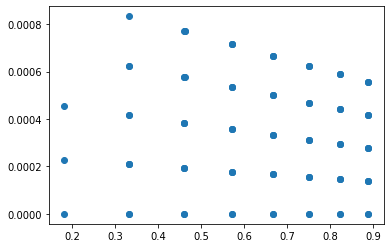

In [50]:
plt.scatter(full_data_res['ethanol concentration wtf'], full_data_res['5CB concentration wtf'])